<a href="https://colab.research.google.com/github/monalAJ/-practice-Outlier-Removal-using-z-score/blob/main/Outlier_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Outlier Removal using z-score**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/scholarship.csv")

In [ ]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [ ]:
df = data.copy()

In [ ]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [ ]:
df.shape

(1000, 3)

<ipython-input-10-3a3961894670>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["semester_percentage"])
<ipython-input-10-3a3961894670>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["scholarship_exam_marks"])


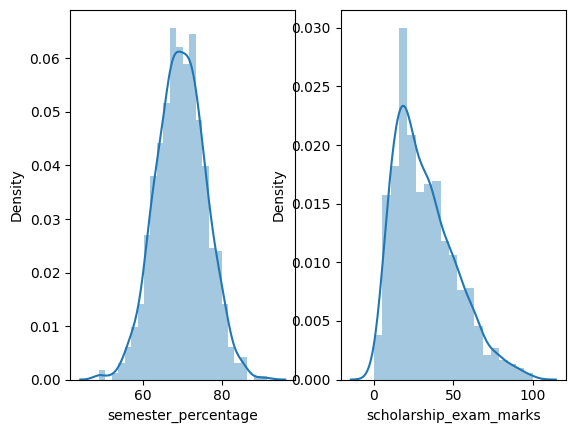

In [ ]:
plt.subplot(1,2,1)
sns.distplot(df["semester_percentage"])

plt.subplot(1,2,2)
sns.distplot(df["scholarship_exam_marks"])

plt.show()

In [ ]:
mean = df["semester_percentage"].mean()
std = df["semester_percentage"].std()

In [ ]:
print(mean , std)

69.6124 6.158978751323897


In [ ]:
highest_allowed = mean + 3*std
lowest_allowed = mean - 3*std


In [ ]:
print(highest_allowed,lowest_allowed)

88.08933625397168 51.13546374602831


In [ ]:
df[(df["semester_percentage"] > lowest_allowed) & (df["semester_percentage"] < highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [ ]:
df["z_score"] = (df["semester_percentage"] - df["semester_percentage"].mean()) / df["semester_percentage"].std()

In [ ]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [ ]:
df[(df["z_score"] <- 3) | (df["z_score"] > 3 )]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [ ]:
df[(df["z_score"] >-3) & (df["z_score"] < 3 )]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


**Capping**

In [ ]:
upper_limit = mean + 3*std
lower_limit = mean - 3*std


In [ ]:
df["semester_percentage"] = np.where(df["semester_percentage"] > upper_limit, upper_limit ,
                                     np.where(df["semester_percentage"] < lower_limit , lower_limit , df["semester_percentage"]))

In [ ]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


In [ ]:
df[(df["semester_percentage"] < lowest_allowed) | (df["semester_percentage"] > highest_allowed)]


,semester_percentage,scholarship_exam_marks,got_scholarship,z_score


**Outlier Remova Using IQR**

<ipython-input-6-72d03db8a797>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

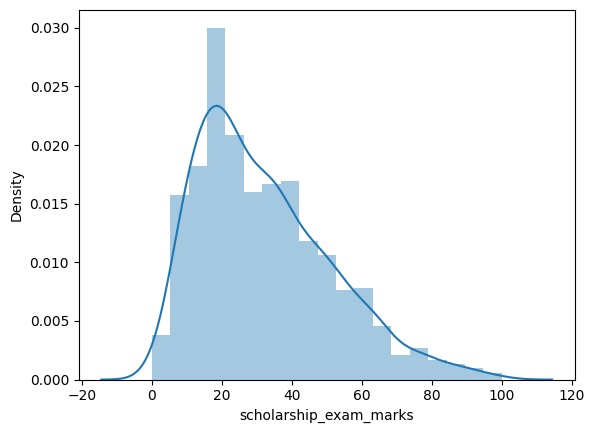

In [6]:
sns.distplot(data["scholarship_exam_marks"])

<Axes: ylabel='scholarship_exam_marks'>

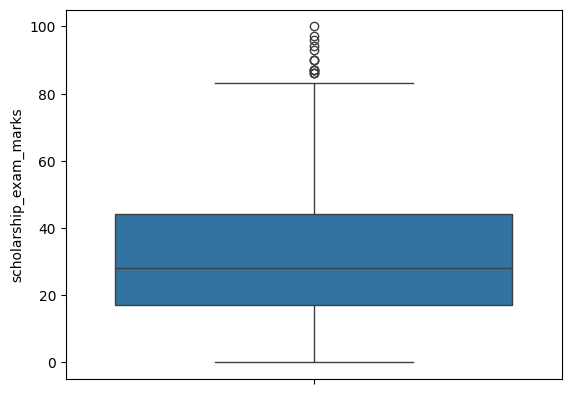

In [7]:
sns.boxplot(data["scholarship_exam_marks"])


In [8]:
Q1 = data["scholarship_exam_marks"].quantile(0.25)
Q3 = data["scholarship_exam_marks"].quantile(0.75)


In [9]:
Q1

17.0

In [10]:
Q3

44.0

In [12]:
IQR = Q3 - Q1

In [13]:
data.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [14]:
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR


In [15]:
min

-23.5

In [16]:
max

84.5

In [17]:
data[(data["scholarship_exam_marks"] < min) | (data["scholarship_exam_marks"] > max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


**Trimming**

In [19]:
new_data = data[(data["scholarship_exam_marks"] > min) & (data["scholarship_exam_marks"] < max)]


<Axes: ylabel='scholarship_exam_marks'>

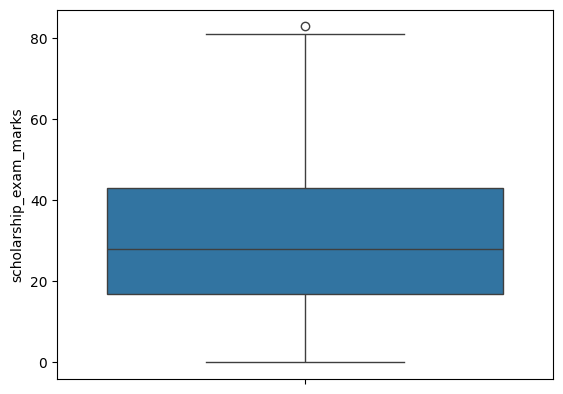

In [21]:
sns.boxplot(new_data["scholarship_exam_marks"])

**Capping**

In [23]:
data["scholarship_exam_marks"] = np.where(data["scholarship_exam_marks"] > max, max,
                                          np.where(data["scholarship_exam_marks"] < min , min , data["scholarship_exam_marks"]))

In [24]:
data.shape

(1000, 3)

<Axes: ylabel='scholarship_exam_marks'>

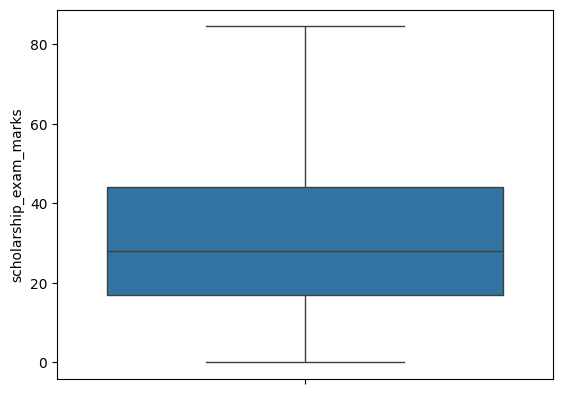

In [25]:
sns.boxplot(data["scholarship_exam_marks"])